In [4]:
import os
import json
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, bernoulli, norm
from scipy.special import expit
from cmdstanpy import CmdStanModel
from matplotlib.lines import Line2D
from experiment_simulation import *
from interact_tool import *
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox, Button, VBox, HBox, Output, Dropdown, HTML

# Contents
[1. hypothesis on pivot](#1-hypothesis-on-pivot)

[2. testing approach1: interactive simulation tool](#2-testing-approach1-interactive-simulation-tool)

[3. testing approach2: integrative hypothesis testing](#3-testing-approach2-integrative-hypothesis-testing)


## 1. hypothesis on pivot

based on interview with biotech and it industry, i developed the hypothesis. In section 1, 2, I provide tool to interactively learn and test six hypotheses.

| `Parameter`                                                 | Hypothesis on $\frac{\text{Time to change implemented desirability}}{\text{Time to change implemented feasibility = 1}}$  (`T2CS`) w.r.t. `Parameter`                                                                                                                                                                                                                                                                                                                                                                                            |
| ----------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| DR: Market Instability, volatility<br>                      | HIGHER DR<br><br>**Hypothesis DR2T2CS:** The more unstable the market is, the time to pivot would be longer as the startup needs to account for noise in the data generating process.<br><br>**Rationale:** In a stable market, the deterministic mapping allows for quicker decision-making, while in an unstable market, the added noise requires more time to gather accurate information.                                                                                                                                                    |
| SR: Size of market segment<br><br>                          | HIGHER SR<br><br>**Hypothesis SR2T2CS:** Time to pivot would be longer if in a bigger market.<br>**Rationale:** <br>-  higher expected revenue (expected future revenue is higher for a bigger market)<br>- lower cost (cheaper to get bigger sample from a bigger market)<br>N is the number of customer a startup can get from unit cost of experiment                                                                                                                                                                                         |
| BR: belief and real gap<br>                                 | HIGHER BR<br><br>**Hypothesis BR2T2CS:** The larger the gap between belief and real market conditions, the longer the time to pivot.<br><br>**Rationale:** When there is a significant discrepancy between the startup's beliefs and the actual market conditions, it may take longer for the startup to gather enough evidence to challenge their assumptions and make the decision to pivot. The larger the gap, the more experiments and data points are needed to bridge the difference and trigger a pivot.                                 |
| DB: Diffuseness of prior belief<br>                         | HIGHER DB<br><br>**Hypothesis DB2T2CS:** The more diffuse the prior belief on the segment (i.e., higher uncertainty), the longer the startup will stick with the chosen market segment before pivoting.<br>**Rationale:** With higher uncertainty, the startup will require more experiments to reduce the uncertainty and make a confident decision about pivoting.                                                                                                                                                                             |
| ER: Experiment opportunity (function of capital)<br>        | HIGHER ER<br><br>**Hypothesis ER2T2CS:** Higher capital would allow the startup to have patience and wait until its experiment passes the threshold.<br><br>**Rationale:** With more capital, the startup can afford to conduct more experiments and gather more evidence before making a pivoting decision.                                                                                                                                                                                                                                     |
| CT: capital threshold before `pivot` market segment<br><br> | HIGHER CT<br><br>**Hypothesis CT2T2CS:**** A higher capital threshold before pivoting to a new market segment will lead to a shorter time to pivot."<br><br>**Rationale:** With a higher capital threshold, the startup will be more impatient and less tolerant of the current market segment's performance. They will pivot faster to a new segment when the current segment fails to meet the higher capital threshold. This aligns with the idea that startups with higher expectations and lower patience are more likely to pivot quickly. |

//

| Example in Biotech                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | Example in IT Industry                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| LONGER T2CS<br><br>In an unstable market, such as during a global pandemic or significant regulatory changes, a biotech startup developing a COVID-19 vaccine may take longer to pivot to a different product or market segment. The instability in the market may require the startup to gather more data, assess the changing landscape, and adapt their strategies before making a pivoting decision. In contrast, in a stable market, the startup may be able to make quicker decisions based on clear market signals and trends.                                                                        | LONGER T2CS<br><br>n an unstable IT market, possibly due to rapid technological changes or economic downturns, a startup developing a mobile app may take longer to pivot to a different market segment or application area. The instability requires the startup to gather more data and assess the evolving market landscape before making a pivot decision. In a stable market, the startup could make faster decisions based on clearer demand signals.                                                                                                                                                  |
| LONGER T2CS<br><br>A biotech startup targeting a large market segment, such as developing a novel cancer immunotherapy, may take longer to pivot compared to a startup focusing on a smaller market segment, like a rare disease. The larger market size offers higher potential revenues and allows for larger sample sizes in clinical trials, which may encourage the startup to persist longer in this segment before considering a pivot.                                                                                                                                                               | LONGER T2CS<br><br>An IT startup in a large market segment like mobile gaming apps may take longer to pivot compared to one in a smaller niche like VR apps for education. The larger mobile gaming market provides higher potential revenues and more extensive user feedback data, which could motivate the startup to keep iterating within this segment longer before considering a pivot to a different app category or market.                                                                                                                                                                         |
| LONGER T2CS<br>A biotech startup may initially believe that there is a high demand for a new type of antibody-drug conjugate (ADC) for treating solid tumors. However, if the actual market demand is lower than expected or if the development of the ADC faces unexpected scientific challenges, there will be a gap between the startup's beliefs and reality. In this case, the startup may need more time and experiments to validate their assumptions, potentially leading to a longer time to pivot to a different approach or market segment.                                                       | LONGER T2CS<br><br>An IT startup may initially believe there is high demand for a new project management SaaS tool. However, if actual customer adoption is slower than expected or development faces unforeseen challenges, a gap emerges between their assumptions and market realities. The startup would then need more time and customer validation to test their hypotheses, likely extending the time before deciding to pivot to a different product or market segment.                                                                                                                              |
| LONGER T2CS<br><br>A biotech startup focusing on developing a novel gene therapy for a rare genetic disorder (Dravet syndrome) may stick with this market segment longer if there is high uncertainty about the therapy's efficacy and market potential. They may conduct more preclinical to gather evidence and reduce uncertainty before considering a pivot to a different therapeutic area or indication.                                                                                                                                                                                               | LONGER T2CS<br><br>An IT startup focusing on a new cloud computing technology may remain longer in its initial market segment if there is high uncertainty about the technology's adoption and market demand. They might engage in more market research and pilot testing to reduce uncertainty before considering a pivot to another technology or market.                                                                                                                                                                                                                                                  |
| LONGER T2CS<br><br>A well-funded biotech startup with a large capital base may have the resources to conduct more extensive preclinical and clinical trials for their lead drug candidate. This financial cushion allows them to gather more comprehensive data before deciding whether to pivot to a different drug candidate or therapeutic area. In contrast, a startup with limited capital may need to make pivoting decisions earlier based on a smaller set of experimental results.                                                                                                                  | LONGER T2CS<br><br>A well-funded IT startup with significant capital may have the resources to extensively test and iterate on their MVP with a large user base before making a pivot decision. The ample funding allows them to run more experiments, gather extensive data, and deeply understand the market before committing to a pivot. In contrast, a startup with limited funding may have to make pivoting choices faster based on early signals.                                                                                                                                                    |
| SHORTER T2CS<br><br>A biotech startup with a high capital threshold (e.g., requiring a high return on investment or a large market size) may have a shorter time to pivot if their current market segment fails to meet these expectations. For example, if a startup is developing a cell therapy for a specific cancer indication but the early clinical trial results do not show a significant improvement over existing treatments, the startup may quickly pivot to a different cancer type or therapeutic modality to meet their high capital threshold and maintain the interest of their investors. | SHORTER T2CS<br><br>(INACCURATE) An IT startup with a high growth rate threshold for their current SaaS product may pivot quickly to a new product or market if the growth metrics fall short of expectations. For example, if a startup expects their user base to grow 20% month-over-month but only sees 5% growth, they may rapidly decide to pivot to a different application or market segment that shows more promise in achieving their desired growth targets and securing the next funding round. The high expectations lead to less patience with the current path and faster pivoting decisions. |

## 2. testing approach1: interactive simulation tool
startups can change different parameters and inspect how six parameters as below affect the types of pivot (market, product) before either scale or fail. 

changing paprameters gives you new plots. Printed two plots below are for:
1. DR = 0, SR = 1, ER = 4, BR = 10, DB = 1, CT = .3
2. DR = 0, SR = 1, ER = 4, BR = 10, DB = 1, CT = .6

18:21:31 - cmdstanpy - INFO - CmdStan start processing
18:21:31 - cmdstanpy - INFO - Chain [1] start processing
18:21:31 - cmdstanpy - INFO - Chain [2] start processing
18:21:31 - cmdstanpy - INFO - Chain [3] start processing
18:21:31 - cmdstanpy - INFO - Chain [4] start processing
18:21:31 - cmdstanpy - INFO - Chain [1] done processing
18:21:31 - cmdstanpy - INFO - Chain [2] done processing
18:21:31 - cmdstanpy - INFO - Chain [3] done processing
18:21:31 - cmdstanpy - INFO - Chain [4] done processing
18:21:31 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 18 divergent transitions (7.2%)
	Chain 2 had 2 divergent transitions (0.8%)
	Chain 3 had 17 divergent transitions (6.8%)
	Chain 4 had 3 divergent transitions (1.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
18:21:31 - cmdstanpy - INFO - CmdStan start processing
18:21:31 - cmdstanpy - INFO - Chain [1] start processing
18:21:31 - cmdstanpy - INFO - Chain [2] start 

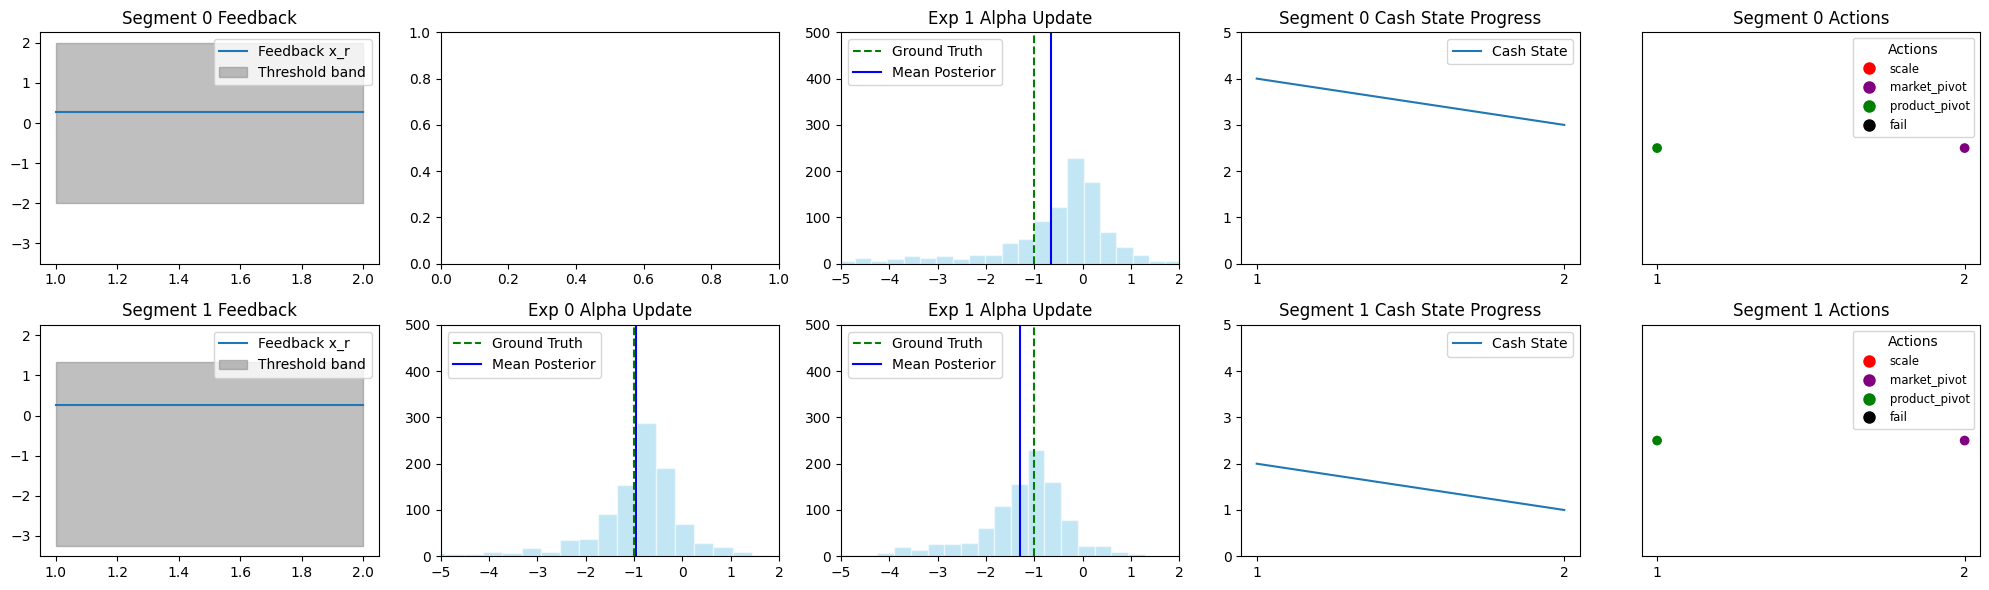

18:21:43 - cmdstanpy - INFO - CmdStan start processing
18:21:43 - cmdstanpy - INFO - Chain [1] start processing
18:21:43 - cmdstanpy - INFO - Chain [2] start processing
18:21:43 - cmdstanpy - INFO - Chain [3] start processing
18:21:43 - cmdstanpy - INFO - Chain [4] start processing
18:21:43 - cmdstanpy - INFO - Chain [1] done processing
18:21:43 - cmdstanpy - INFO - Chain [2] done processing
18:21:43 - cmdstanpy - INFO - Chain [3] done processing
18:21:43 - cmdstanpy - INFO - Chain [4] done processing
18:21:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 9 divergent transitions (3.6%)
	Chain 2 had 3 divergent transitions (1.2%)
	Chain 3 had 5 divergent transitions (2.0%)
	Chain 4 had 22 divergent transitions (8.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
18:21:43 - cmdstanpy - INFO - CmdStan start processing
18:21:43 - cmdstanpy - INFO - Chain [1] start processing
18:21:43 - cmdstanpy - INFO - Chain [2] start p

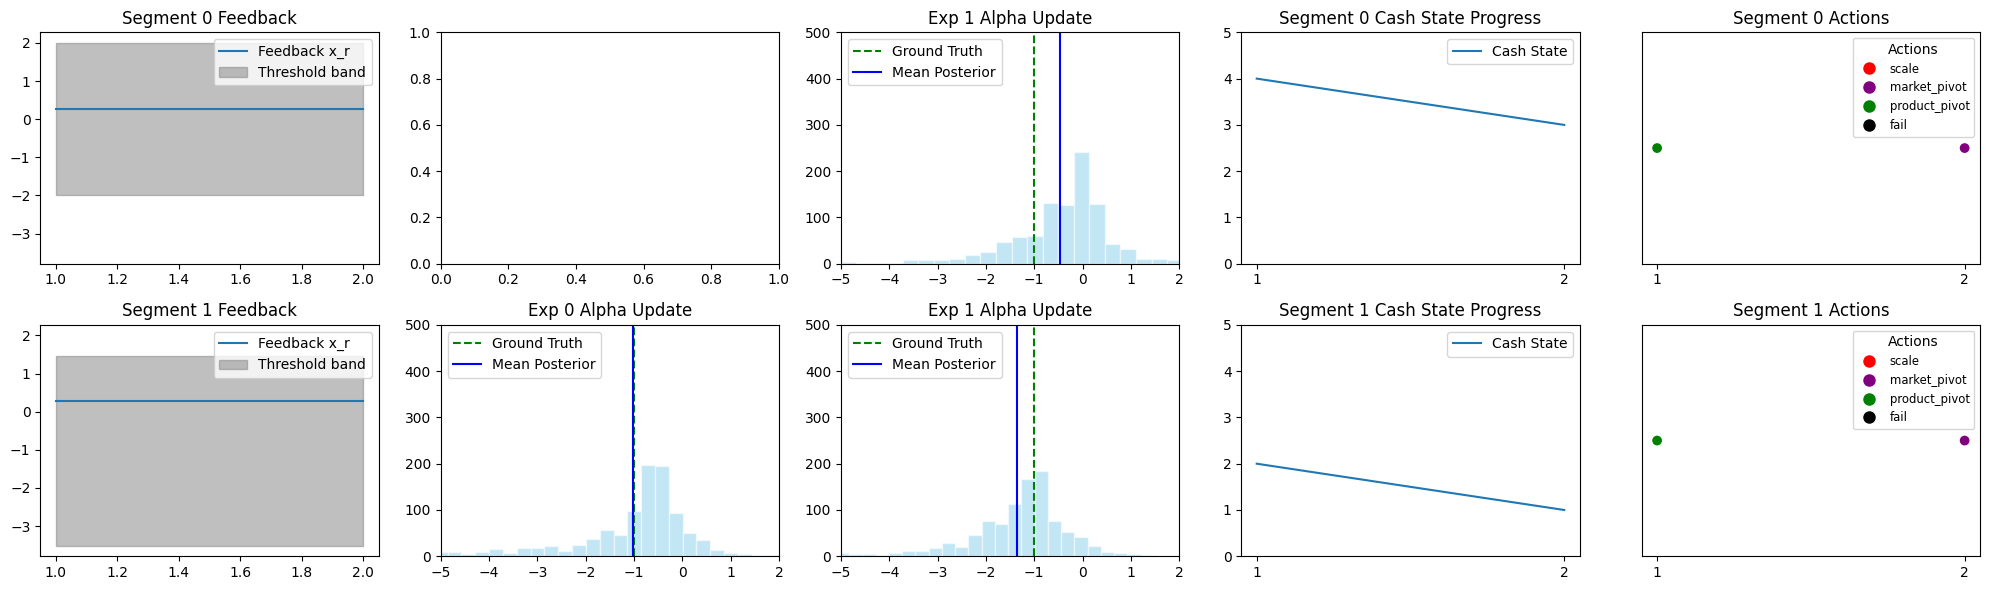

In [ ]:
interact_tool()

## 3. testing approach2: integrative hypothesis testing

above interacive tool is helpful to get the feel but cannot systematically inspect entire parameter space. `plot_hypo_test` allows this by iterative over all identified parameter value and give summary statics on final pivot actions according to decision rules.

For instance, with
```
DR = [0, 1]
SR = [1, 10]
BR = [1, 5]
DB = [1, 5]
ER = [5, 10]
CT = [0.1, 0.7]
S, M, K = 2, 5, 1000
```
simulation result suggests: 
ratio of market pivot to product pivot is higher when
- SR: market size is bigger (.30 > .27)
- ER: less chance to experiment due to cash constraint (.32>.27)
- CT: less committed to one market  (.36 > .24)

18:22:43 - cmdstanpy - INFO - CmdStan start processing
18:22:43 - cmdstanpy - INFO - Chain [1] start processing
18:22:43 - cmdstanpy - INFO - Chain [2] start processing
18:22:43 - cmdstanpy - INFO - Chain [3] start processing
18:22:43 - cmdstanpy - INFO - Chain [4] start processing
18:22:43 - cmdstanpy - INFO - Chain [1] done processing
18:22:43 - cmdstanpy - INFO - Chain [2] done processing
18:22:43 - cmdstanpy - INFO - Chain [3] done processing
18:22:43 - cmdstanpy - INFO - Chain [4] done processing
18:22:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 11 divergent transitions (4.4%)
	Chain 2 had 6 divergent transitions (2.4%)
	Chain 3 had 9 divergent transitions (3.6%)
	Chain 4 had 8 divergent transitions (3.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
18:22:43 - cmdstanpy - INFO - CmdStan start processing
18:22:43 - cmdstanpy - INFO - Chain [1] start processing
18:22:43 - cmdstanpy - INFO - Chain [2] start p

Ratios:
hypothesis: ratio/db>0, ratio/dr>0, ratio/sr>0, ratio/br>0, ratio/er>0, ratio/ct>0
DR Low: 0.30, DR High: 0.28
SR Low: 0.30, SR High: 0.26
BR Low: 0.29, BR High: 0.29
DB Low: 0.29, DB High: 0.29
ER Low: 0.33, ER High: 0.27
CT Low: 0.25, CT High: 0.34
Difference in Means:
hypothesis: ratio/db>0, ratio/dr>0, ratio/sr>0, ratio/br>0, ratio/er>0, ratio/ct>0
DR: -0.02
SR: -0.04
BR: 0.01
DB: 0.00
ER: -0.06
CT: 0.10


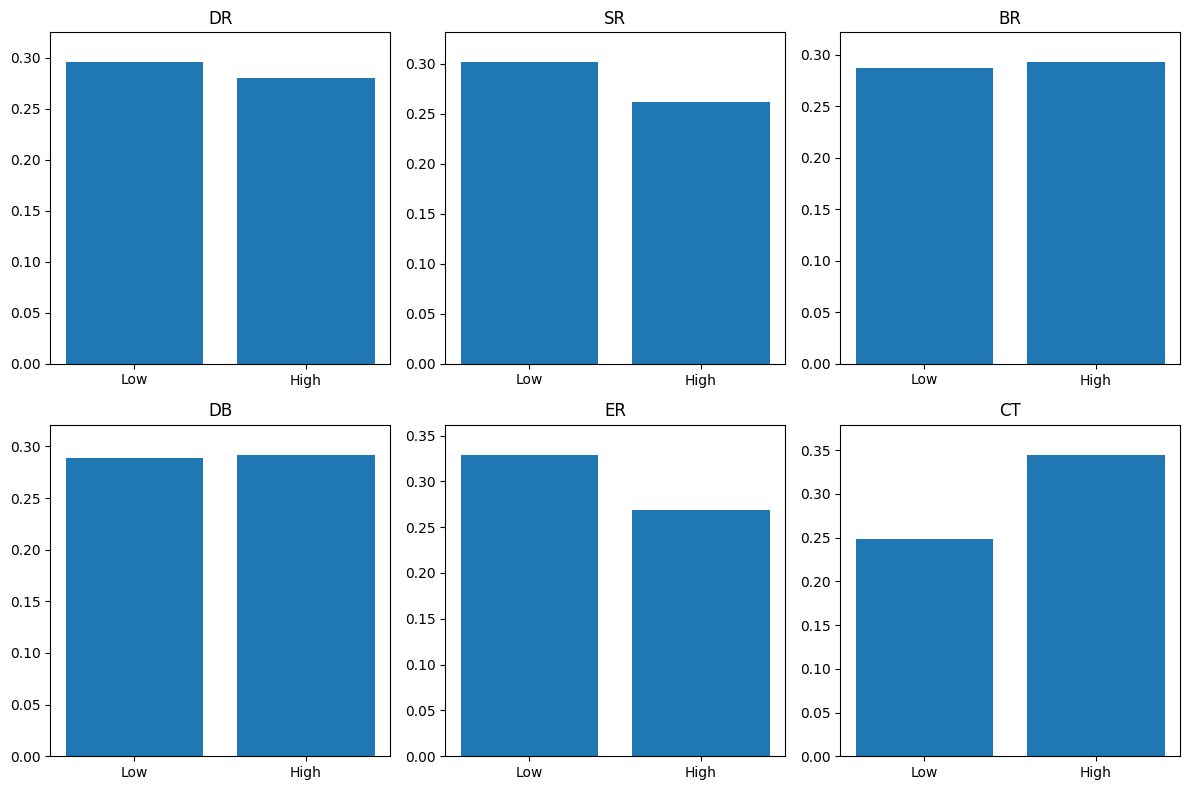

In [6]:
## Hyperparameter setting
DR = [0, 1]
SR = [1, 10]
BR = [1, 5]
DB = [1, 5]
ER = [5, 10]
CT = [0.1, 0.7]
S, M, K = 2, 5, 1000
calc_sim_summ_stat(DR, SR, BR, DB, ER, CT, S, M, K)
plot_hypo_test(DR, SR, BR, DB, ER, CT, S, M, K)